# H $\alpha$ flare 2014 

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2014-09-06/fits/Ha/"
# "E:\solar flares\data\2014-09-06\fits\Ha\crisp_l2_20140906_152724_6563_r00000.fits"

ntime = 618
print(f"number of indices: {ntime}")

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= ntime:
        raise IndexError(f'frame number {frame} is not in (0, {ntime}).')
    else:
        return f"{folder_path}\crisp_l2_20140906_152724_6563_r00{frame:03d}.fits"
ttff = timeframe_to_filename_fits



number of indices: 618


<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_16152\869960150.py:14: SyntaxWarning: invalid escape sequence '\c'
  return f"{folder_path}\crisp_l2_20140906_152724_6563_r00{frame:03d}.fits"


In [3]:
head0 = f.getheader(ttff(0))
head0, head0["DATE-AVG"]

(SIMPLE  =                    T / Written by IDL:  Sun Nov 19 15:12:28 2017      
 BITPIX  =                   16 / Number of bits per data pixel                  
 NAXIS   =                    3 / Number of data axes                            
 NAXIS1  =                 1473 /                                                
 NAXIS2  =                 1398 /                                                
 NAXIS3  =                   15 /                                                
 EXTEND  =                    T / FITS data may contain extensions               
 DATE    = '2017-11-19'         / Creation UTC (CCCC-MM-DD) date of FITS header  
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
 EXTNAME = 'H_I_6563'           /                                                
 SOLARNET=             0.500000 /                                                
 OBS_HDU =      

In [4]:
def tframe_to_time(frame):
    head0 = f.getheader(ttff(frame))
    t = head0["DATE-AVG"]
    return t[11:19]
time_list = [tframe_to_time(frame) for frame in range(ntime)]
time_list, len(time_list)

(['15:27:27',
  '15:27:38',
  '15:27:50',
  '15:28:01',
  '15:28:13',
  '15:28:25',
  '15:28:36',
  '15:28:48',
  '15:28:59',
  '15:29:11',
  '15:29:23',
  '15:29:34',
  '15:29:46',
  '15:29:57',
  '15:30:09',
  '15:30:20',
  '15:30:32',
  '15:30:44',
  '15:30:55',
  '15:31:07',
  '15:31:18',
  '15:31:30',
  '15:31:41',
  '15:31:53',
  '15:32:05',
  '15:32:16',
  '15:32:28',
  '15:32:39',
  '15:32:51',
  '15:33:02',
  '15:33:14',
  '15:33:26',
  '15:33:37',
  '15:33:49',
  '15:34:00',
  '15:34:12',
  '15:34:24',
  '15:34:35',
  '15:34:47',
  '15:34:58',
  '15:35:10',
  '15:35:22',
  '15:35:33',
  '15:35:45',
  '15:35:56',
  '15:36:08',
  '15:36:20',
  '15:36:31',
  '15:36:43',
  '15:36:54',
  '15:37:06',
  '15:37:18',
  '15:37:29',
  '15:37:41',
  '15:37:52',
  '15:38:04',
  '15:38:15',
  '15:38:27',
  '15:38:39',
  '15:38:50',
  '15:39:02',
  '15:39:13',
  '15:39:25',
  '15:39:37',
  '15:39:48',
  '15:40:00',
  '15:40:11',
  '15:40:23',
  '15:40:35',
  '15:40:46',
  '15:40:58',
  '15:

In [5]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    for hdl in io:
        print(hdl.data)
        print("Dat was nu nog zo'n hdl")
    wvl = io[-1].data
    print(wvl)
    print(np.shape(wvl))

extent = wvl[0]

print(wvl)

np.save('line_data/wav_sstHa.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001B42F78C170>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001B42F78D9A0>]
[[[2946 2946 2946 ... 2946 2946 2946]
  [2946 2946 2946 ... 2946 2946 2946]
  [2946 2946 2946 ... 2946 2946 2946]
  ...
  [2946 2946 2946 ... 2946 2946 2946]
  [2946 2946 2946 ... 2946 2946 2946]
  [2946 2946 2946 ... 2946 2946 2946]]

 [[2897 2897 2897 ... 2897 2897 2897]
  [2897 2897 2897 ... 2897 2897 2897]
  [2897 2897 2897 ... 2897 2897 2897]
  ...
  [2897 2897 2897 ... 2897 2897 2897]
  [2897 2897 2897 ... 2897 2897 2897]
  [2897 2897 2897 ... 2897 2897 2897]]

 [[2808 2808 2808 ... 2808 2808 2808]
  [2808 2808 2808 ... 2808 2808 2808]
  [2808 2808 2808 ... 2808 2808 2808]
  ...
  [2808 2808 2808 ... 2808 2808 2808]
  [2808 2808 2808 ... 2808 2808 2808]
  [2808 2808 2808 ... 2808 2808 2808]]

 ...

 [[2825 2825 2825 ... 2825 2825 2825]
  [2825 2825 2825 ... 2825 2825 2825]
  [2825 2825 2825 ... 2825 2825 2825]
  ...
  [2825 2825 2825 ... 2825 28

In [6]:
reload(un)
Ha = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHa.npy', number_of_frames=ntime,
                 time=time_list, name_of_line='Ha14a', thresh=[0, np.percentile(f.getdata(ttff(0)), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01, "index_of_zero":[4,5,6]}, with_stokes=False, with_time=False)




E:/solar flares/data/2014-09-06/fits/Ha/\crisp_l2_20140906_152724_6563_r00000.fits
s=(15, 1398, 1473)
the shape of the data is (618, 1, 15, 1398, 1473)
the wavelengths are self._wavel = array([6563.18399967, 6563.38399971, 6563.58399976, 6563.78399981,
       6563.98399986, 6564.1839999 , 6564.38399995, 6564.584     ,
       6564.78400005, 6564.9840001 , 6565.18400014, 6565.38400019,
       6565.58400024, 6565.78400029, 6565.98400033], dtype='>f8')
(1398, 1473) (1398, 1473)
Boundary
Blue=Outside, yellow=Inside


If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [7]:
# Ha.calculate__FOV_spect_over_time()

In [8]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Ha.shape=}')

Not official start flare defined for Ha14a falling back to first of TIME[0], the execpt_time 15:27:27.
the mean cadence is 11.568881685575368 seconds for this line!
Ha.shape=(618, 1, 15, 1398, 1473)


In [9]:
# %matplotlib inline
Ha.update_filters(None)
Ha.plot_filt(880,900)
plt.show()

The guessed filters are [[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]]


(1398, 1473, 3)


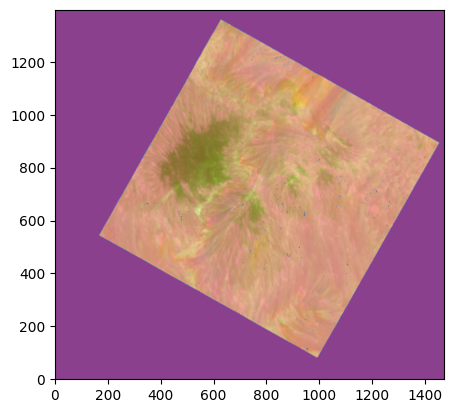

(1398, 1473, 3)


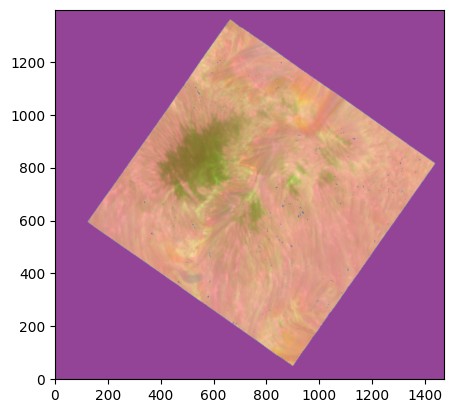

(1398, 1473, 3)


(1398, 1473, 3)


(1398, 1473, 3)


(1398, 1473, 3)


(1398, 1473, 3)


In [10]:
# %matplotlib widget
for frame in range(0,Ha._number_of_frames, 100):
    # frame=0
    Ha.ccp_frame(frame,Show=False)
    plt.imshow(Ha.current_ccp, origin='lower')
    plt.imshow(Ha.calculate_boundary(frame=frame), alpha=0.4, origin="lower")

    # plt.imshow(Haundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary))

In [10]:
reload(un)
theor_Ha = un.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

6562.797056366136 6562.797056366135


## Calculating the $\mu$ !!!!! 


In [11]:
Ha.shape

(618, 1, 15, 1398, 1473)

In [12]:
def timeframe_to_extent(frame, timeframe_to_filename_fits):
    head = f.getheader(timeframe_to_filename_fits(frame))
    x = head["CRVAL1"]
    y = head["CRVAL2"]
    Dx = head['CDELT1'] 
    Dy = head['CDELT2']
    ny, nx = Ha.shape[-2:]
    nx0 = head['CRPIX1']
    ny0 = head['CRPIX2']
    extent = [x - Dx*nx0, x + Dx*(nx-nx0), y - Dy*ny0, y + Dy*(ny-ny0), ]

    print(f"extent timeframe {frame} is ", extent)
    return extent

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        K = MU * np.where(over.boundary==0, np.nan, 1)
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

In [13]:

frame = 0
extent = timeframe_to_extent(frame, ttff)
xx, yy, MU = extent_to_grid(extent, Ha.shape, invert=False, angle=0)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=Ha,
    save=True,
    save_name=Ha.name_of_line,
    timeFrame=frame,
)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


extent timeframe 0 is  [-779.689, -695.728, -352.0, -272.314]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.559739146768996 for timeframe 0
Coundourplot succesfully saved.


In [14]:

frame = 510
extent = timeframe_to_extent(frame, ttff)
xx, yy, MU = extent_to_grid(extent, Ha.shape, invert=False, angle=0)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=Ha,
    save=True,
    save_name=Ha.name_of_line,
    timeFrame=frame,
)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


extent timeframe 510 is  [-770.9540000000001, -686.993, -353.47999999999996, -273.794]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.5533724859868557 for timeframe 510
Coundourplot succesfully saved.


In [15]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63)


## Finding a suitable quiet sun patch

In [16]:
frame, Ha.shape

(510, (618, 1, 15, 1398, 1473))

In [17]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Ha.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(1200,1400),(800,1000)], [(200,300), (500, 600)], [(1000, 1200), (200, 400)], [(400,500),(550,750)], [(600,1300),(700, 900)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title(
    f"spectral lines of SST frame {frame}"
    + " H\u03B1 with normalized intensity"
)
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc*theor_Ha.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Ha.current_ccp,origin='lower')
ax[1].set_title("COCO.plot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

    ax[0].plot(Ha._wavel, Ha.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
plt.show()


<>:44: SyntaxWarning: invalid escape sequence '\C'
<>:44: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_16152\815560715.py:44: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')


### Choose patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [18]:
color_wanted_patch = 'yellow'

In [19]:
np.shape(theor_Ha.fov[0])

(1398, 1473)

In [20]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Ha.quiet_sun

the edges of the patch are denoted by the xlim: (1000, 1200) and ylim: (200, 400)


The quiet sun is pick at x (-708.2399242527173, -336.39627988546886) with average              mu 0.5765600027741857
[[-0.74394848 -0.74388904 -0.7438296  ... -0.73223914 -0.7321797
  -0.73212027]
 [-0.74394848 -0.74388904 -0.7438296  ... -0.73223914 -0.7321797
  -0.73212027]
 [-0.74394848 -0.74388904 -0.7438296  ... -0.73223914 -0.7321797
  -0.73212027]
 ...
 [-0.74394848 -0.74388904 -0.7438296  ... -0.73223914 -0.7321797
  -0.73212027]
 [-0.74394848 -0.74388904 -0.7438296  ... -0.73223914 -0.7321797
  -0.73212027]
 [-0.74394848 -0.74388904 -0.7438296  ... -0.73223914 -0.7321797
  -0.73212027]] [[-0.35646222 -0.35646222 -0.35646222 ... -0.35646222 -0.35646222
  -0.35646222]
 [-0.35640278 -0.35640278 -0.35640278 ... -0.35640278 -0.35640278
  -0.35640278]
 [-0.35634334 -0.35634334 -0.35634334 ... -0.35634334 -0.35634334
  -0.35634334]
 ...
 [-0.34475246 -0.34475246 -0.34475246 ... -0.34475246 -0.34475246
  -0.34475246]
 [-0.34469302 -0.34469302 -0.34469302 ... -0.34469302 -0.34469302
  

{'frame': 9, 'xlim': (1000, 1200), 'ylim': (200, 400), 'color': 'yellow'}

[6563.18399967 6563.38399971 6563.58399976 6563.78399981 6563.98399986
 6564.1839999  6564.38399995 6564.584      6564.78400005 6564.9840001
 6565.18400014 6565.38400019 6565.58400024 6565.78400029 6565.98400033] [1.45956941 1.43523433 1.39014866 1.27183496 1.01084971 0.67154897
 0.49732789 0.45250211 0.48486607 0.62361422 0.93060557 1.22264013
 1.41291124 1.47438318 1.4562866 ] [0.33720531 0.54212878 0.68412773 0.75556326 0.75322923 0.73727716
 0.85628807 0.89121796 0.91582725 0.93947641 0.96312556 0.98677472
 1.01042387 1.03407303 1.05772218]
[1.78694363 2.29507317]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 639.7814376418813
        x: [ 1.838e+00  1.877e+00]
      nit: 7
      jac: [ 3.052e-05  3.052e-05]
 hess_inv: [[ 8.909e-12  1.195e-11]
            [ 1.195e-11  2.781e-05]]
     nfev: 42
     njev: 14


de p-waarde is  4.064561861008205e-06 
Chi^2 reduced= 49.21395674168318 
aantal vrijheidgraden= 13 
chi^2= 639.7814376418813
we behouden de fit tot op een betrouwbaarheidsniveau van  4.064561861008205e-06 
Oftewel verwerp als p-waarde <lpha-niveau 


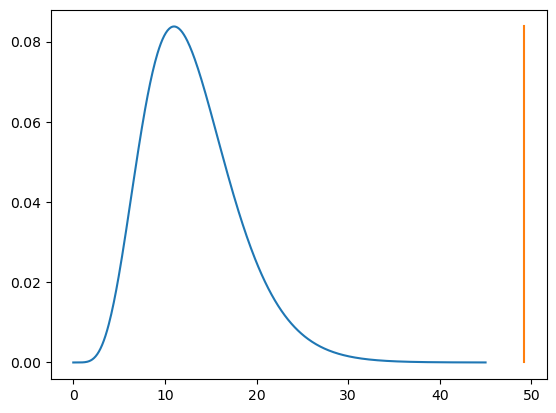

In [21]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

## The full FOV integrated spectrum over time:

In [22]:
Ha.calculate__FOV_spect_over_time()

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

[1.45956941 1.43523433 1.39014866 1.27183496 1.01084971 0.67154897
 0.49732789 0.45250211 0.48486607 0.62361422 0.93060557 1.22264013
 1.41291124 1.47438318 1.4562866 ] [1.5237813  1.48069733 1.41713256 1.29344763 1.03643619 0.6238045
 0.4214747  0.37019296 0.40269408 0.57183904 0.9509697  1.24026947
 1.40625176 1.42326101 1.38516898] [-0.06421189 -0.045463   -0.02698391 -0.02161267 -0.02558649  0.04774447
  0.07585319  0.08230915  0.08217199  0.05177518 -0.02036413 -0.01762934
  0.00665947  0.05112217  0.07111763]


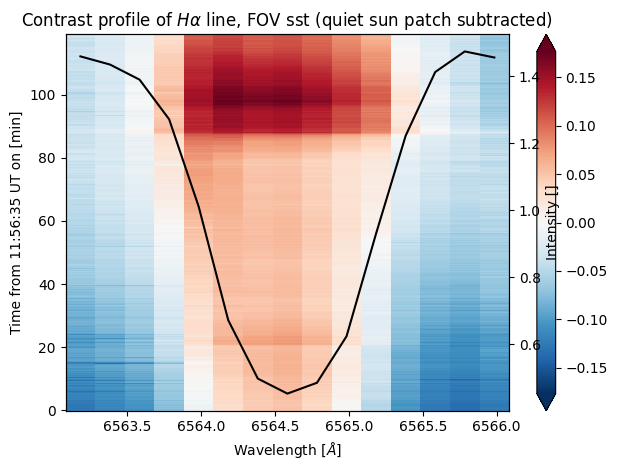

In [ ]:
# TIME = un.get_TIME(Ha)

# FOV_spectrum = Ha.FOV_spectrum
# QS = sst_data.quiet_spect
# QS2 = theor_line.adapted_fov_spectr()(sst_data._wavel)
# print(QS, QS2, QS - QS2)
# Z = FOV_spectrum - QS
# x = sst_data._wavel
# y = Ha.TIME
# TIME = y
# X, Y = np.meshgrid(x, y)
# # print(X,Y)

# fig, ax = plt.subplots(1, 1)

# # pcm = ax[0].pcolormesh(X, Y, Z,
# #                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
# #                                               vmin=-1.0, vmax=1.0, base=10),
# #                        cmap='RdBu_r', shading='auto')
# # fig.colorbar(pcm, ax=ax[0], extend='both')


# pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
# fig.colorbar(pcm, ax=ax, extend='both')
# ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
# ax.set_ylabel('Time from 11:56:35 UT on [min]')
# ax.set_xlabel(r'Wavelength [$\AA$]')

# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'black'
# ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
# ax2.plot(x,QS, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.show()

[1.8383489183826, 0, 1.8840103776881532]
[[1.33579486 1.31725959 1.28255081 ... 1.28833167 1.34313847 1.33600347]
 [1.32776794 1.31828797 1.28375958 ... 1.28561686 1.33872632 1.33095778]
 [1.3329673  1.31724811 1.28213246 ... 1.28612018 1.33942532 1.33072717]
 ...
 [1.4251655  1.4129547  1.38313099 ... 1.39548928 1.44086951 1.39302288]
 [1.42673005 1.41366257 1.38210556 ... 1.39639391 1.44113143 1.39397224]
 [1.42395858 1.41001777 1.38165016 ... 1.39548298 1.44500249 1.39315334]] [1.5237813  1.48069733 1.41713256 1.29344763 1.03643619 0.6238045
 0.4214747  0.37019296 0.40269408 0.57183904 0.9509697  1.24026947
 1.40625176 1.42326101 1.38516898]


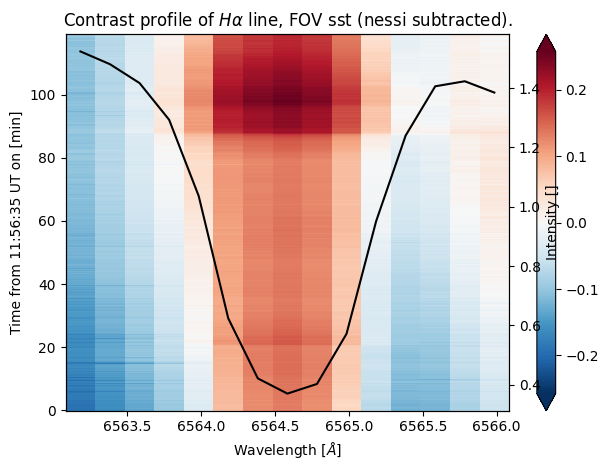

In [ ]:
# theta = theor_Ha.theta_nessi_to_quiet_sun
# print(theta)
# theor_line = theor_Ha

# sst_data = Ha
# QS = theor_Ha.adapted_fov_spectr()(sst_data._wavel)
# plt.plot(QS)
# print(FOV_spectrum, QS)
# Z = FOV_spectrum - QS
# x = sst_data._wavel
# X, Y = np.meshgrid(x, y)
# # print(X,Y)

# fig, ax = plt.subplots(1, 1)

# # pcm = ax[0].pcolormesh(X, Y, Z,
# #                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
# #                                               vmin=-1.0, vmax=1.0, base=10),
# #                        cmap='RdBu_r', shading='auto')
# # fig.colorbar(pcm, ax=ax[0], extend='both')


# pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
# fig.colorbar(pcm, ax=ax, extend='both')
# ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
# ax.set_ylabel('Time from 11:56:35 UT on [min]')
# ax.set_xlabel(r'Wavelength [$\AA$]')

# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'black'
# ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
# ax2.plot(x,QS, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.show()

In [23]:
Ha.stand_dev_quiet_sun()

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [24]:

# def save_for_further_analysis(sst_data, theor_line):
#     print("lol")
#     # theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
#     theta = sst_data.theta_nessi_to_quiet_sun

#     # check that FOV_spectrum is saved:
#     sst_data.FOV_spectrum

#     # save quiet_sun profile
#     filename = un.get_file_path_line_data(f"quiet_sun_{sst_data.name_of_line}")
#     if theta[1] != 0:
#         raise ValueError(f'theta[1]={theta[1]} should be zero!')
#     np.save(filename, np.array([sst_data._wavel-theta[0], sst_data.quiet_spect/theta[2], sst_data.std_quiet_sun/theta[2]]))
    
#     # small comparison for area factor
#     print(f'The areafactor for this flare is {theor_line.fov_areafactor} compared to 60**2/np.pi/959.63**2 = {60**2/np.pi/959.63**2}.\
#         However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.')

#     # save nessi best clv spectrum and full disk
#     filename = un.get_file_path_line_data(f"nessi_{sst_data.name_of_line}")
#     if hasattr(theor_line, "spectr_fov"):
#         np.save(filename, np.array([theor_line.sst_wav, theor_line.saas_profile, theor_line.spectr_fov]))
#     else:
#         raise TypeError("Use un3.linestudier!")
#     # save time in minutes
#     filename = un.get_file_path_line_data(f"TIME_{sst_data.name_of_line}")
#     np.save(filename,sst_data.TIME)

In [25]:
import use_nessi as un1
reload(un1)
un1.save_for_further_analysis(Ha, theor_Ha)


The peak occurs at frame [508] at time ['t=17:05:23 UT'].
The areafactor for THIS flare is 0.000993901969835033 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 79.87%.


In [28]:
reload(un)

<module 'use_nessi3' from 'E:\\solar flares/data/2017-09-06\\use_nessi3.py'>

# Movie Making

In [26]:
# fill in here all arguments
theor_line = theor_Ha
sst_data = Ha
name_of_flare = "M1.1"
name_of_line = "Ha"

# un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=100)


In [38]:
filename = f'E:/solar flares/data/animations/{name_of_flare.replace(".", "")}_{name_of_line}_animation.mp4'
import matplotlib.animation as animation

if os.path.isfile(filename):
    print(f"The filename {filename} already exist")
    

#params
frame = 0
fps = 6
nSeconds = 5

The filename E:/solar flares/data/animations/M11_Ha_animation.mp4 already exist


In [39]:

def derive_intensity_lim(sst_data, mins = [], maxs = []):
    n = sst_data._number_of_frames   
    
    for frame in range(0, n, max(n//10, 1)):
        sst_data.frame_integrated_spect(frame)
        mins.append(np.min(sst_data.av_spect))
        maxs.append(np.max(sst_data.av_spect))
        
    return np.min(np.array(mins)), np.max(np.array(maxs))

theta = sst_data.theta_nessi_to_quiet_sun
theta[1] = theta[2]

f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_qs 
                                , kind='linear', fill_value="extrapolate")
f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_fov 
                                , kind='linear', fill_value="extrapolate")
f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.saas_profile 
                                , kind='linear', fill_value="extrapolate")


wav = un.merge_wavelengths(sst_data._wavel- theta[0], theor_line.sst_wav)
if "CaK" in name_of_line:
    wav = wav[:-1]



limit = derive_intensity_lim(sst_data, 
                                mins=[np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav))],
                                maxs=[np.max(f_nessi_saas(theta)(wav)), np.max(f_nessi_fov(theta)(wav))])


In [40]:
wav, limit, np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav)), theta

(array([6560.78205637, 6560.93705637, 6561.09205637, 6561.24705637,
        6561.34565075, 6561.40205637, 6561.5456508 , 6561.55705637,
        6561.71205637, 6561.74565084, 6561.86705637, 6561.94565089,
        6562.02205637, 6562.14565094, 6562.17705637, 6562.20805637,
        6562.23905637, 6562.27005637, 6562.30105637, 6562.33205637,
        6562.34565099, 6562.36305637, 6562.39405637, 6562.42505637,
        6562.45605637, 6562.48705637, 6562.51805637, 6562.54565103,
        6562.54905637, 6562.58005637, 6562.61105637, 6562.64205637,
        6562.67305637, 6562.70405637, 6562.73505637, 6562.74565108,
        6562.76605637, 6562.79705637, 6562.82805637, 6562.85905637,
        6562.89005637, 6562.92105637, 6562.94565113, 6562.95205637,
        6562.98305637, 6563.01405637, 6563.04505637, 6563.07605637,
        6563.10705637, 6563.13805637, 6563.14565118, 6563.16905637,
        6563.20005637, 6563.23105637, 6563.26205637, 6563.29305637,
        6563.32405637, 6563.34565122, 6563.35505

frame: 0, 15:27:27, total number of frames: 618 


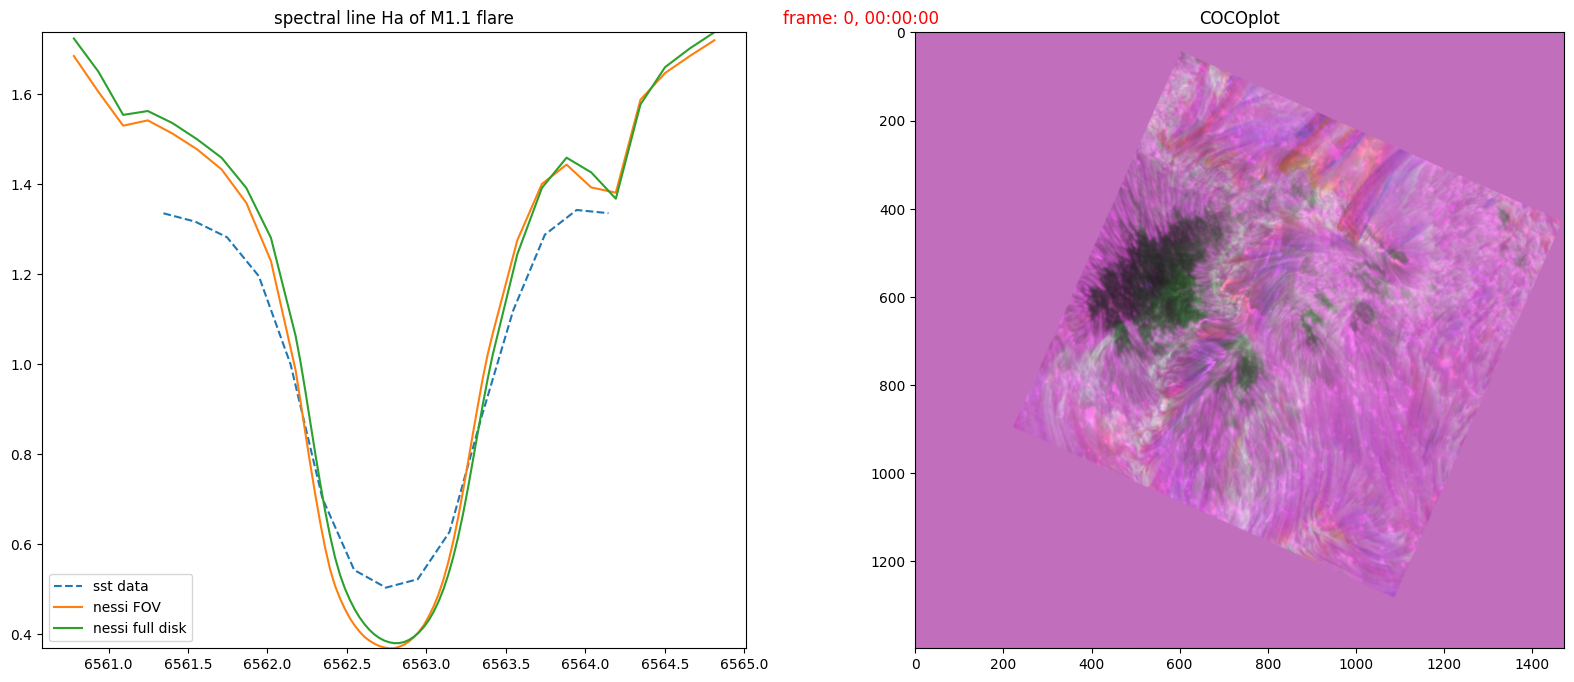

In [49]:
reload(un)

def frame_visualization(sst_data, frame, theta):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 8), gridspec_kw={"width_ratios":[1,1]})

    sst_data.ccp_frame(frame,Show=False)
    a=sst_data.current_ccp

    ax[0].set_title(f"spectral line {name_of_line} of {name_of_flare} flare")
    sst_data.frame_integrated_spect(frame)
    if 'CaK' in name_of_line:
        line_sst, = ax[0].plot(sst_data._wavel[:-1]-theta[0], sst_data.av_spect[:-1], '--', label='sst data') 
    else:
        line_sst, = ax[0].plot(sst_data._wavel-theta[0], sst_data.av_spect, '--', label='sst data')
    ax[0].plot(wav , f_nessi_fov(theta)(wav), label='nessi FOV')
    ax[0].plot(wav, f_nessi_saas(theta)(wav), label='nessi full disk')
    ax[0].legend()

    ax[0].set_ylim(limit)

    im = ax[1].imshow(Image.fromarray(sst_data.current_ccp[::-1,:]))
    ax[1].set_title("COCOplot")
    text = ax[1].text(
        -300,
        -20,
        f"frame: {frame}, {un.time_hulp(sst_data.TIME[frame])}",
        fontsize=12,
        color='red',
    )
    print(
        f"frame: {frame}, {sst_data._time[frame]}, total number of frames: {sst_data._number_of_frames} "
    )

    plt.show()

    return fig, line_sst,  im, text




fig, line_sst, im, text, = frame_visualization(sst_data, frame, sst_data.theta_nessi_to_quiet_sun)

# animation function.  This is called sequentially
def animate(i):
    # step of number of frames. How to step through the frames, at which rate.
    frame = step * i

    x = sst_data._wavel-theta[0]
    y = sst_data.frame_integrated_spect(frame)
    # f_sst2 = interp1d(sst_data._wavel-theta[0], y, kind='linear', fill_value="extrapolate")
    line_sst.set_data(x, y)

    print(frame, end=" ")


    text.set_text(f"frame: {str(frame)}, {str(sst_data._time[frame])[:8]}")

    sst_data.ccp_frame(frame,Show=False)
    a = sst_data.current_ccp
    im.set_array(Image.fromarray(a[::-1,:]))
    return line_sst, [im], text



In [ ]:
# step = 1
# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate,
#                             frames=(sst_data._number_of_frames-1) // step, interval=500) 

# # save the animation as an mp4.  This requires ffmpeg or mencoder to be
# # installed.  The extra_args ensure that the x264 codec is used, so that
# # the video can be embedded in html5.  You may need to adjust this for
# # your system: for more information, see
# # http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save(filename, fps=fps, extra_args=['-vcodec', 'libx264'])



# print("We are exiting this kernel")

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 

In [ ]:
# exit()

Intensity limit calculation for first time.
Intensity limit is saved.
Preparing first frame.


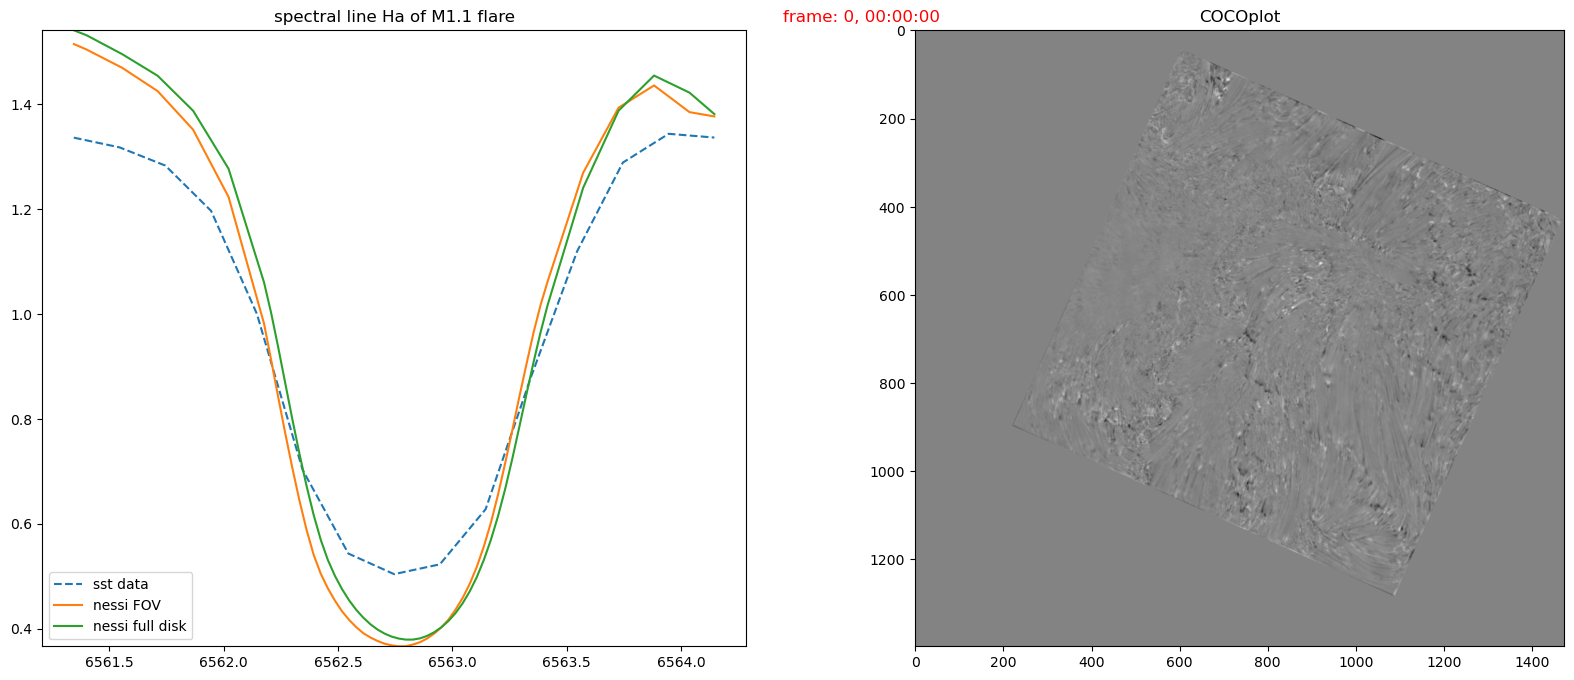

saving the animation. Now calculating frame:


In [27]:
import use_nessi as un1
reload(un1)
un1.Difference_Movie_gray(theor_line, sst_data, name_of_flare, name_of_line, wavelength=6, 
                         step=1, show_boundary=False, frame_offset=5, time_offset=60, only_frame=None)
